Impacts by region_LF paper

In [208]:
%matplotlib inline

import pandas as pd
import geopandas
import numpy as np
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [179]:
countries_ecoinvent = geopandas.read_file("all/all.shp")

In [180]:
countries_ecoinvent.head()

,id,gid,collection,name,isotwolett,uncode,longitude,isothreele,unsubregio,latitude,unregionco,uuid,shortname,geometry
0,93,165.0,countries,Norfolk Island,NF,574.0,167.955169,NFK,None,-29.034975,None,10271ce4-7d7e-11de-9ae2-0019e336be3a,NF,"POLYGON ((167.98414 -29.01784, 167.99635 -29.0..."
1,345,NaN,special,Canada without Alberta and Quebec,None,NaN,-101.081437,None,None,62.961360,None,ae9d0b20-e4e3-4cd3-9699-63eca5319c9b,Canada without Alberta and Quebec,"MULTIPOLYGON (((-125.29166 48.86607, -125.3060..."
2,342,NaN,special,Canada without Quebec,None,NaN,-101.926868,None,None,62.470639,None,a4d7d7fd-94ae-4f44-91ba-53cd7f79bac4,Canada without Quebec,"MULTIPOLYGON (((-125.29166 48.86607, -125.3060..."
3,343,NaN,special,North America without Quebec,None,NaN,-106.458046,None,None,55.276727,None,aab06382-a476-4bec-a78b-d2fc0b849980,North America without Quebec,"MULTIPOLYGON (((-155.60652 20.13796, -155.5863..."
4,341,NaN,special,"Europe, without Russia and Turkey",None,NaN,14.593857,None,None,53.261512,None,c670b4a0-6051-4935-bafe-866736a010a9,"Europe, without Russia and Turkey","MULTIPOLYGON (((3.45729 -54.39007, 3.47779 -54..."


<AxesSubplot:>

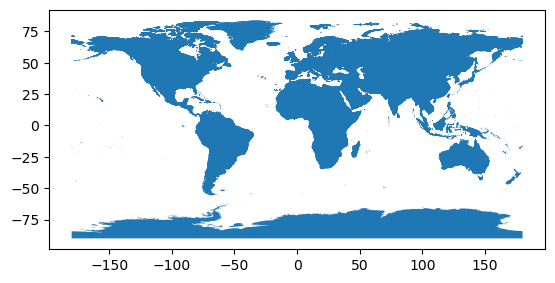

In [181]:
countries_ecoinvent.plot()

In [182]:
countries_ecoinvent.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [416]:
#Reading the region wise climate change impacts from Activity Browser

climate_change = pd.read_csv("Climate change.csv")
climate_change_FG = climate_change.drop(climate_change.index[[2,3,4,5]])

In [417]:
climate_change.head()

,shortname,S1,S2,S3,S4,FG
0,BE,17.484290,17.766137,11.960203,15.475650,NaN
1,FR,12.141390,12.143499,5.960777,2.983139,NaN
2,Europe without Switzerland,-3.016904,-1.487127,-5.563553,-4.844832,NaN
3,RER w/o RU,-2.847752,-1.216774,-6.813455,-8.236535,NaN
4,RU,-1.648279,-1.093639,-4.844407,-3.303582,NaN


In [418]:
climate_change_FG

,shortname,S1,S2,S3,S4,FG
0,BE,17.484290,17.766137,11.960203,15.475650,NaN
1,FR,12.141390,12.143499,5.960777,2.983139,NaN
6,RoW,1.233652,1.335328,1.178884,9.718823,NaN
7,GLO,0.514947,0.556293,0.068491,0.600933,NaN
8,IT,0.351200,0.175983,0.027690,0.188195,NaN
...,...,...,...,...,...,...
69,RLA,NaN,NaN,NaN,0.036558,NaN
70,UN-SEASIA,NaN,NaN,NaN,0.016915,NaN
71,SAS,NaN,NaN,NaN,0.016210,NaN
72,RAF,NaN,NaN,NaN,0.014237,NaN


In [419]:
#We now match the shortnames in the climate change csv with the geometries provided by ecoinvent

cc = countries_ecoinvent.merge(climate_change, on =["shortname"], how="left")
cc_FG = countries_ecoinvent.merge(climate_change_FG, on =["shortname"], how="left")

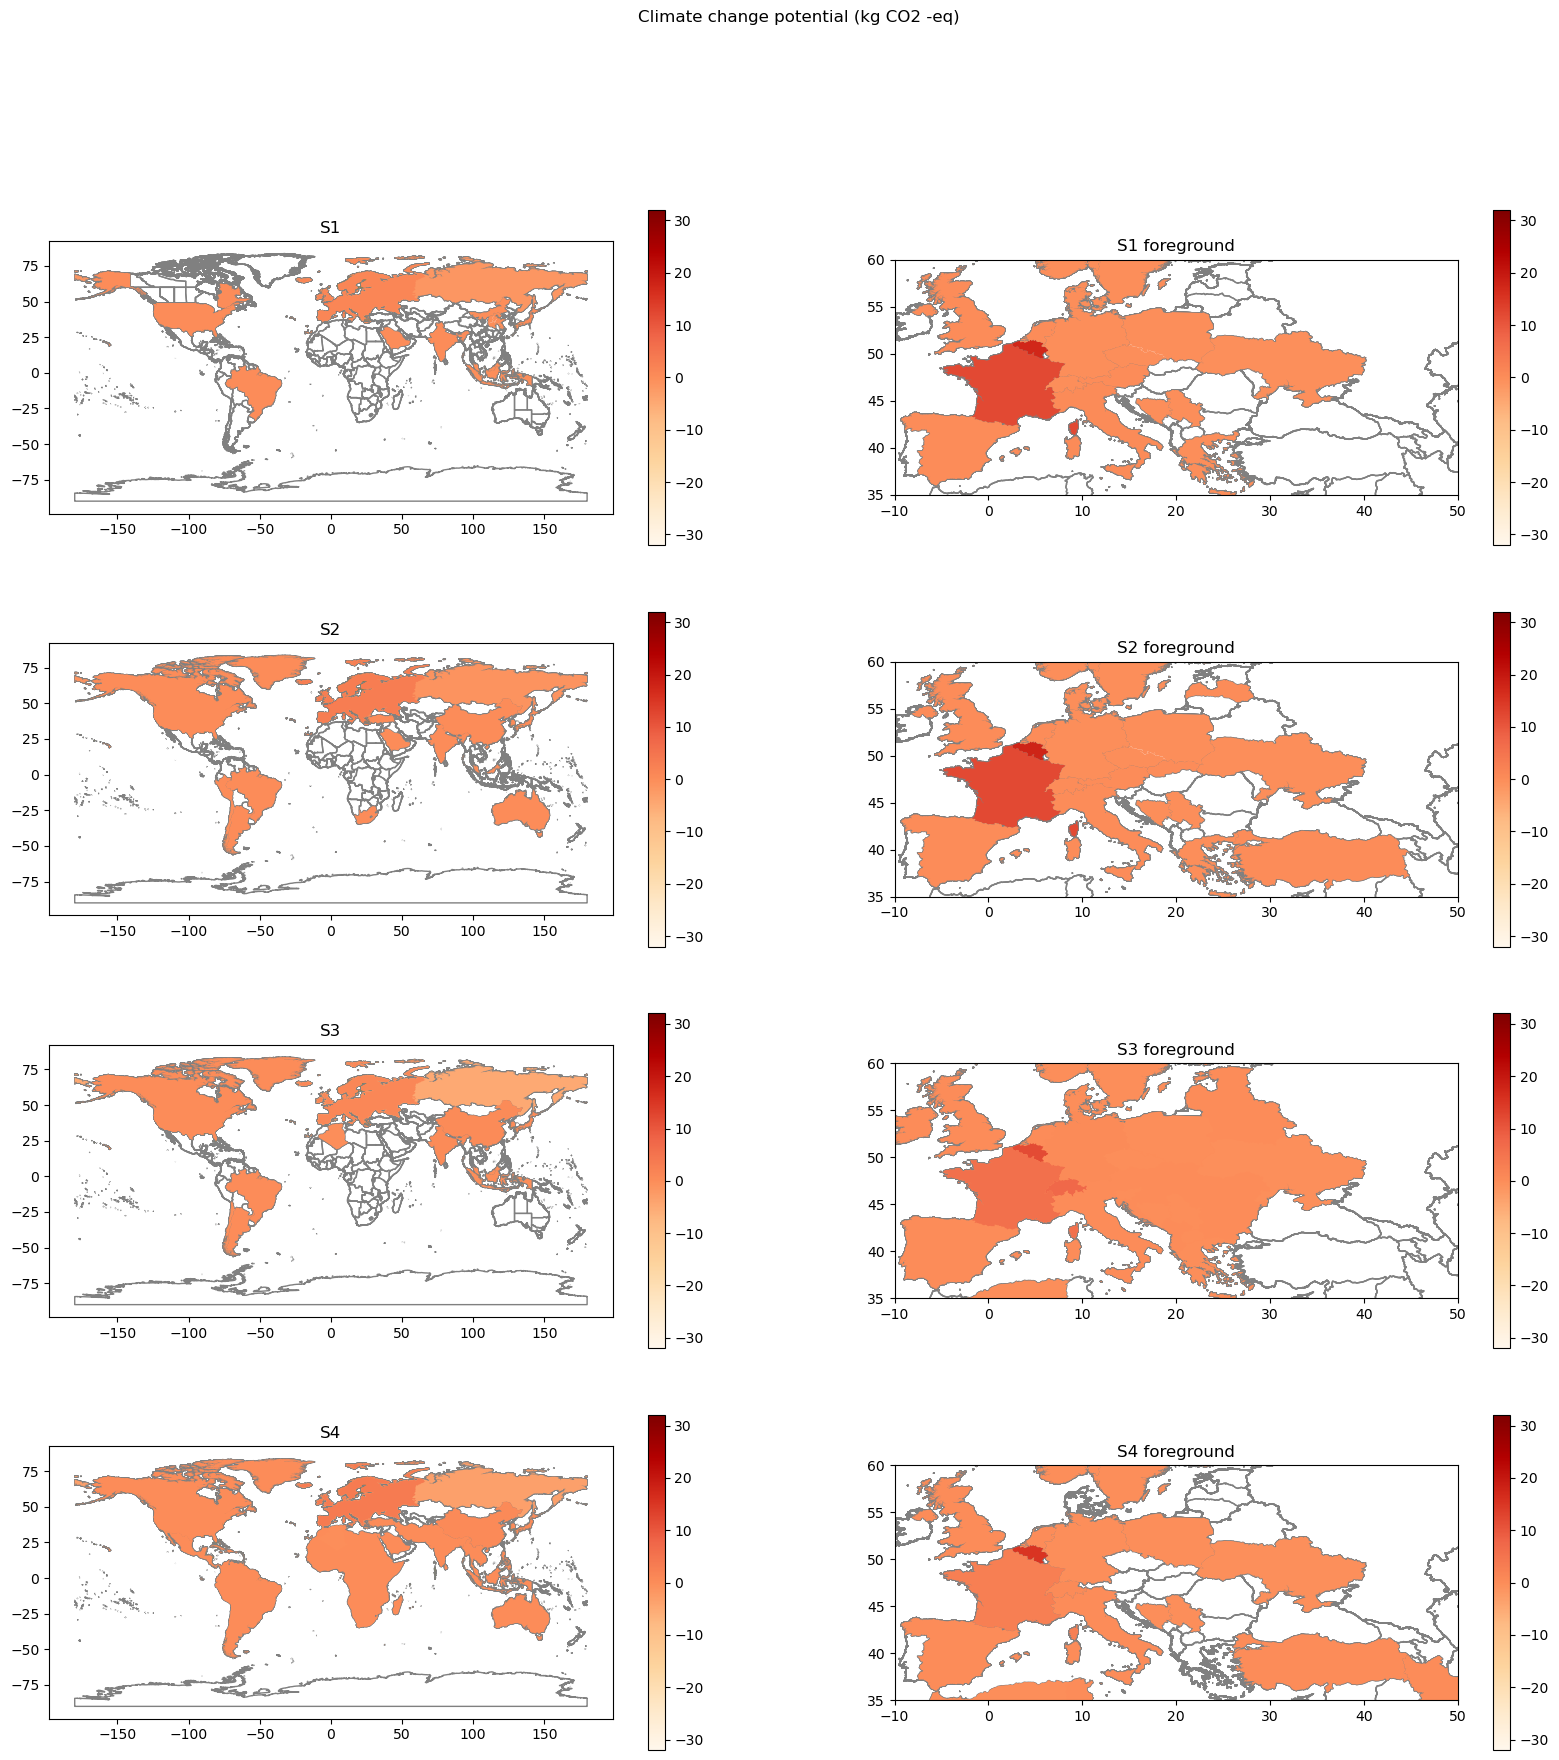

In [420]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize= (20,20))

#ax = countries_ecoinvent["geometry"].boundary.plot(figsize=(15, 6), edgecolor='black', linewidth=0.05)

ax1 = cc_FG[["S1", "geometry"]].plot(ax=axes[0,1], column='S1', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-32, vmax=32)
ax1.set(xlim=(-10, 50), ylim=(35, 60))
ax2 = cc_FG[["S2", "geometry"]].plot(ax=axes[1,1], column='S2', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=-32, vmax=32)
ax2.set(xlim=(-10, 50), ylim=(35, 60))
ax3 = cc_FG[["S3", "geometry"]].plot(ax=axes[2,1], column='S3', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=-32, vmax=32)
ax3.set(xlim=(-10, 50), ylim=(35, 60))
ax4 = cc_FG[["S4", "geometry"]].plot(ax=axes[3,1], column='S4', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=-32, vmax=32)
ax4.set(xlim=(-10, 50), ylim=(35, 60))


ax5 = cc[["S1", "geometry"]].plot(ax=axes[0,0], column='S1', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-32, vmax=32)
ax6 = cc[["S2", "geometry"]].plot(ax=axes[1,0], column='S2', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-32, vmax=32)
ax7 = cc[["S3", "geometry"]].plot(ax=axes[2,0], column='S3', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-32, vmax=32)
ax8 = cc[["S4", "geometry"]].plot(ax=axes[3,0], column='S4', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-32, vmax=32)

fig.suptitle("Climate change potential (kg CO2 -eq)", fontsize=12)


# set the title to subplots
ax1.title.set_text('S1 foreground')
ax2.title.set_text('S2 foreground')
ax3.title.set_text('S3 foreground')
ax4.title.set_text('S4 foreground')
ax5.title.set_text('S1')
ax6.title.set_text('S2')
ax7.title.set_text('S3')
ax8.title.set_text('S4')  

plt.savefig('CC_regional.png', dpi=1200)
# set spacing
#fig.tight_layout()

In [338]:
acidification = pd.read_csv("Acidification.csv")
acidification_FG = acidification.drop(acidification.index[[0,2,4,5,6,7,9,11]])
acidification_FG

,shortname,S1,S2,S3,S4
1,BE,0.077958,0.165104,0.115284,0.068391
3,FR,0.030195,0.030201,0.038660,0.084582
8,CN,-0.002450,NaN,-0.003890,NaN
10,PL,-0.001806,NaN,NaN,NaN
12,US,NaN,0.000793,NaN,NaN
13,CH,NaN,NaN,0.010760,NaN
14,IN,NaN,NaN,NaN,0.001689


In [339]:
#We now match the shortnames in the climate change csv with the geometries provided by ecoinvent

ta = countries_ecoinvent.merge(acidification, on =["shortname"], how="left")
ta_FG = countries_ecoinvent.merge(acidification_FG, on =["shortname"], how="left")
ta_FG.head()

,id,gid,collection,name,isotwolett,uncode,longitude,isothreele,unsubregio,latitude,unregionco,uuid,shortname,geometry,S1,S2,S3,S4
0,93,165.0,countries,Norfolk Island,NF,574.0,167.955169,NFK,None,-29.034975,None,10271ce4-7d7e-11de-9ae2-0019e336be3a,NF,"POLYGON ((167.98414 -29.01784, 167.99635 -29.0...",NaN,NaN,NaN,NaN
1,345,NaN,special,Canada without Alberta and Quebec,None,NaN,-101.081437,None,None,62.961360,None,ae9d0b20-e4e3-4cd3-9699-63eca5319c9b,Canada without Alberta and Quebec,"MULTIPOLYGON (((-125.29166 48.86607, -125.3060...",NaN,NaN,NaN,NaN
2,342,NaN,special,Canada without Quebec,None,NaN,-101.926868,None,None,62.470639,None,a4d7d7fd-94ae-4f44-91ba-53cd7f79bac4,Canada without Quebec,"MULTIPOLYGON (((-125.29166 48.86607, -125.3060...",NaN,NaN,NaN,NaN
3,343,NaN,special,North America without Quebec,None,NaN,-106.458046,None,None,55.276727,None,aab06382-a476-4bec-a78b-d2fc0b849980,North America without Quebec,"MULTIPOLYGON (((-155.60652 20.13796, -155.5863...",NaN,NaN,NaN,NaN
4,341,NaN,special,"Europe, without Russia and Turkey",None,NaN,14.593857,None,None,53.261512,None,c670b4a0-6051-4935-bafe-866736a010a9,"Europe, without Russia and Turkey","MULTIPOLYGON (((3.45729 -54.39007, 3.47779 -54...",NaN,NaN,NaN,NaN


In [ ]:
#Plotting the boundaaries first

#fig, axes = plt.subplots(nrows=4, ncols=1, figsize= (20,20))

ax = countries_ecoinvent["geometry"].boundary.plot(figsize=(15, 6), edgecolor='black', linewidth=0.05)
ax1 = countries_ecoinvent["geometry"].boundary.plot(figsize=(15, 6), edgecolor='black', linewidth=0.05)
cc[["S3", "geometry"]].plot(figsize=(15, 6), column='S3', legend=True, zorder=2, ax=ax, cmap='OrRd', vmin=-20, vmax=20)


ax1.set(xlim=(-10, 50), ylim=(35, 60))
cc_FG[["S3", "geometry"]].plot(figsize=(15, 6), column='S3', legend=True, zorder=2, ax=ax1, cmap='OrRd', vmin=-20, vmax=20)

In [306]:
#For freshwater ecotoxicity

fe= pd.read_csv("Freshwater ecotoxicity.csv")
fe = fe.drop(index=0)
fe['shortname'].unique()

array(['RER', 'RoW', 'GLO', 'Europe without Switzerland', 'CH', 'US',
       'CN', 'CA', 'RU', 'RER w/o RU', 'AU', 'ZM', 'RNA', 'CL', 'MX',
       'ID', 'MY', 'CA-SK', 'PE', 'Europe, without Russia and Turkey',
       'IN', 'FR', 'KZ', 'BR-RS', 'DE', 'ZA'], dtype=object)

In [155]:
(set(impacts['shortname'].unique())).difference(set(countries_ecoinvent['shortname'].unique()))

{'GLO', 'Rest', 'RoW'}

In [344]:
fe = countries_ecoinvent.merge(impacts, on ="shortname", how="left")
fe = fe.dropna(subset = ['S1', 'S2', 'S3', 'S4'])

#fe.dropna(subset='S2')

In [352]:
me = countries_ecoinvent.merge(impacts, on="shortname", how="left")
#me.dropna(subset='S2')
#me.dropna(subset='S1')

In [421]:
#Reading the region wise climate change impacts from Activity Browser

terrestrial_eutrophication = pd.read_csv("Terrestrial eutrophication.csv")
terrestrial_eutrophication

,shortname,S1,S2,S3,S4
0,Rest,-0.005748,-0.000272,-0.003743,0.001414
1,BE,0.354740,0.738268,0.504112,0.294626
2,RER w/o RU,-0.139303,0.018908,-0.320518,-0.282629
3,FR,0.134665,0.134691,0.172379,0.377191
4,RER,-0.109569,-0.031344,-0.166839,-0.134807
...,...,...,...,...,...
70,SAS,NaN,NaN,NaN,0.000334
71,RAF,NaN,NaN,NaN,0.000280
72,UN-SEASIA,NaN,NaN,NaN,0.000279
73,UN-OCEANIA,NaN,NaN,NaN,0.000185


In [423]:
te_FG = terrestrial_eutrophication.drop(terrestrial_eutrophication.index[[0,2,4]])
te_FG.head()

,shortname,S1,S2,S3,S4
1,BE,0.354740,0.738268,0.504112,0.294626
3,FR,0.134665,0.134691,0.172379,0.377191
5,Europe without Switzerland,-0.011183,-0.003563,-0.017832,-0.012774
6,GLO,0.007672,0.018856,0.005682,0.024103
7,RoW,0.005290,0.015543,-0.000630,0.053470


In [424]:
#We now match the shortnames in the climate change csv with the geometries provided by ecoinve#We now match the shortnames in the climate change csv with the geometries provided by ecoinvent

te = countries_ecoinvent.merge(terrestrial_eutrophication, on =["shortname"], how="left")
te_FG1 = countries_ecoinvent.merge(te_FG, on =["shortname"], how="left")

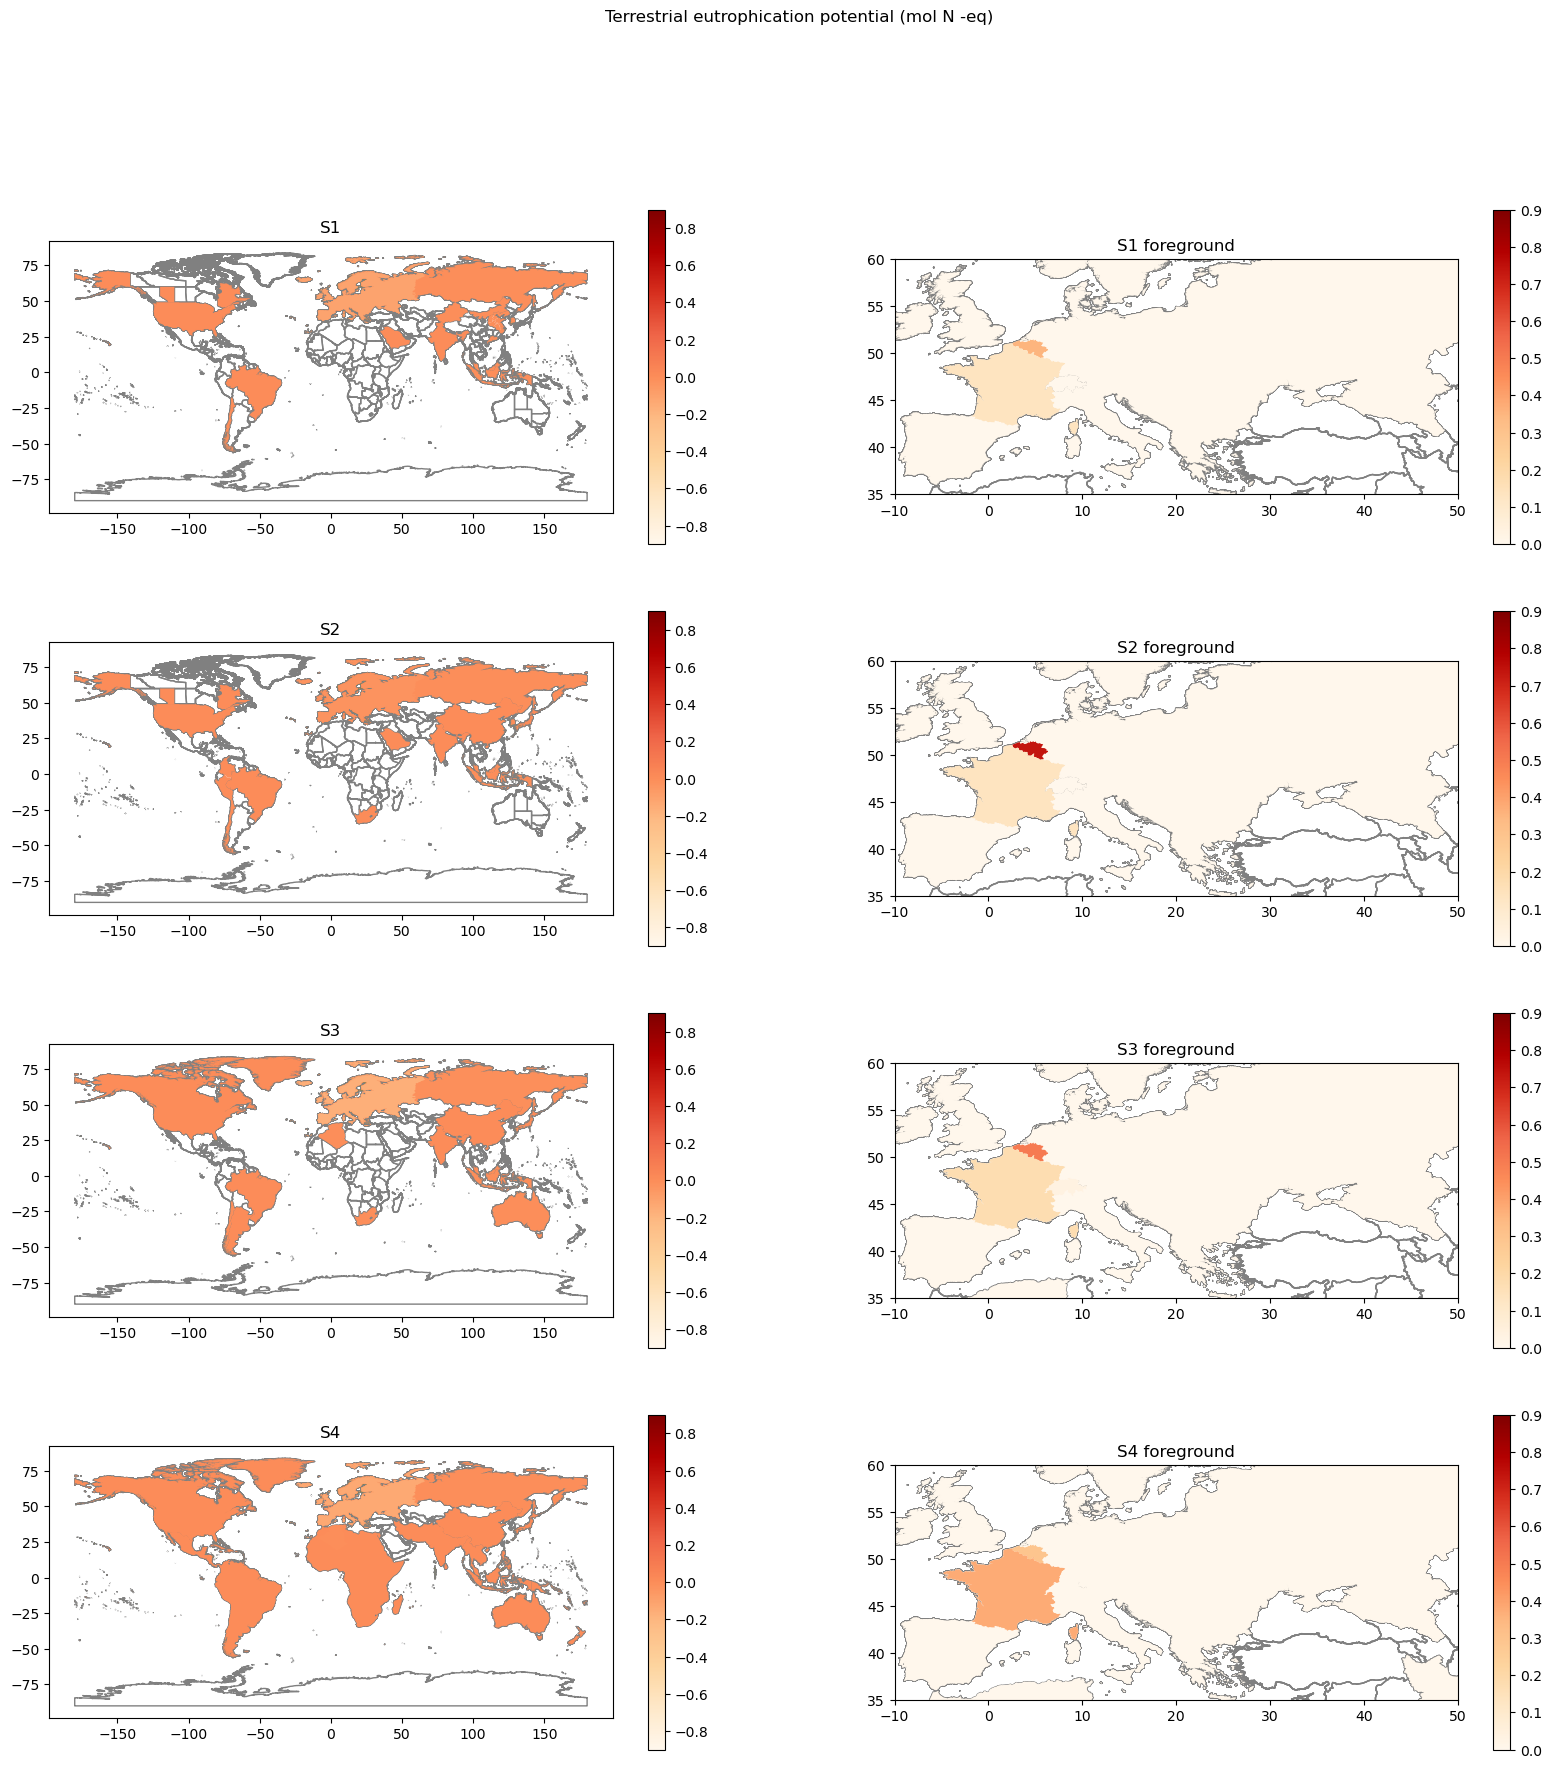

In [425]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize= (20,20))

#ax = countries_ecoinvent["geometry"].boundary.plot(figsize=(15, 6), edgecolor='black', linewidth=0.05)

ax1 = te_FG1[["S1", "geometry"]].plot(ax=axes[0,1], column='S1', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=0, vmax=0.9)
ax1.set(xlim=(-10, 50), ylim=(35, 60))
ax2 = te_FG1[["S2", "geometry"]].plot(ax=axes[1,1], column='S2', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=0, vmax=0.9)
ax2.set(xlim=(-10, 50), ylim=(35, 60))
ax3 = te_FG1[["S3", "geometry"]].plot(ax=axes[2,1], column='S3', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=0, vmax=0.9)
ax3.set(xlim=(-10, 50), ylim=(35, 60))
ax4 = te_FG1[["S4", "geometry"]].plot(ax=axes[3,1], column='S4', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=0, vmax=0.9)
ax4.set(xlim=(-10, 50), ylim=(35, 60))


ax5 = te[["S1", "geometry"]].plot(ax=axes[0,0], column='S1', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-0.9, vmax=0.9)
ax6 = te[["S2", "geometry"]].plot(ax=axes[1,0], column='S2', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-0.9, vmax=0.9)
ax7 = te[["S3", "geometry"]].plot(ax=axes[2,0], column='S3', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-0.9, vmax=0.9)
ax8 = te[["S4", "geometry"]].plot(ax=axes[3,0], column='S4', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-0.9, vmax=0.9)

fig.suptitle("Terrestrial eutrophication potential (mol N -eq)", fontsize=12)


# set the title to subplots
ax1.title.set_text('S1 foreground')
ax2.title.set_text('S2 foreground')
ax3.title.set_text('S3 foreground')
ax4.title.set_text('S4 foreground')
ax5.title.set_text('S1')
ax6.title.set_text('S2')
ax7.title.set_text('S3')
ax8.title.set_text('S4')  

plt.savefig('TE_regional.png', dpi=1200)

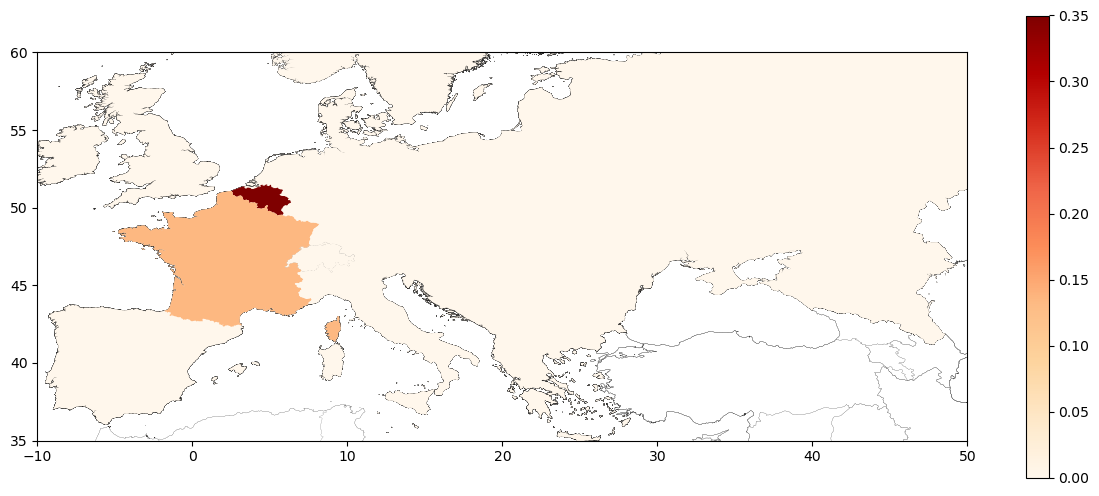

In [381]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize= (20,20))


ax = te_FG1[["S1", "geometry"]].plot(ax=axes[0], column='S1', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd',  vmin=-0.9, vmax=0.9)
ax = te_FG1[["S2", "geometry"]].plot(ax=axes[1], column='S2', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=-0.9, vmax=0.9)
ax = te_FG1[["S3", "geometry"]].plot(ax=axes[2], column='S3', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=-0.9, vmax=0.9)
ax = te_FG1[["S4", "geometry"]].plot(ax=axes[3], column='S4', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd', vmin=-0.9, vmax=0.9)


ax.set(xlim=(-10, 50), ylim=(35, 60))

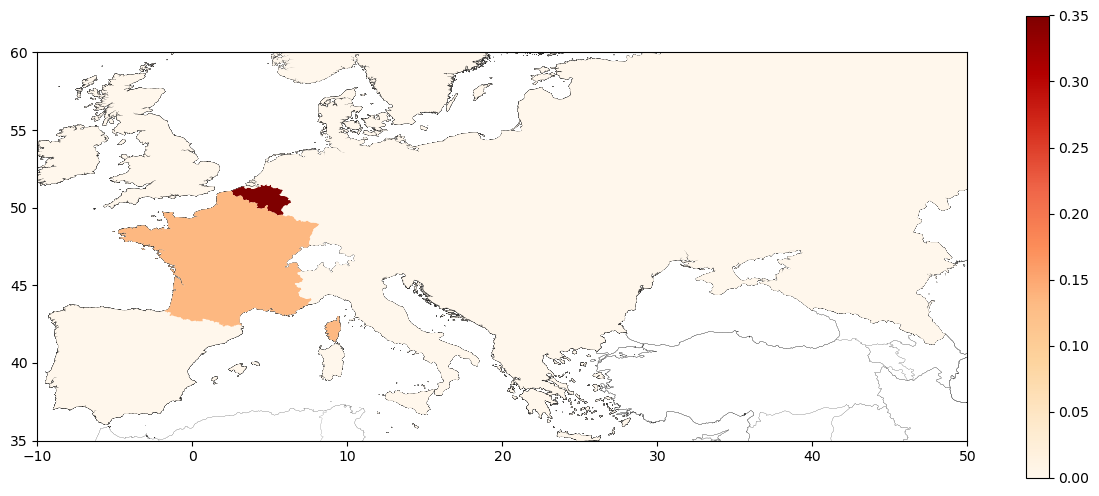

In [384]:
ax1 = countries_ecoinvent["geometry"].boundary.plot(figsize=(15, 6), edgecolor='black', linewidth=0.05)
ax1.set(xlim=(-10, 50), ylim=(35, 60))

S2= te_FG1[["S2", "geometry"]].plot(figsize=(15, 6),  column='S2', legend=True, zorder=2, ax=ax1, cmap='OrRd', vmin=0, vmax=0.35)

In [224]:
climate_change = pd.read_csv("Climate change.csv")
climate_change = climate_change.drop(index=0)

In [226]:
merged_CC = countries_ecoinvent.merge(climate_change, on="shortname")
merged_CC

,id,gid,collection,name,isotwolett,uncode,longitude,isothreele,unsubregio,latitude,unregionco,uuid,shortname,geometry,S1,S2,S3,S4
0,332,NaN,special,Europe without Russia,None,NaN,14.593857,None,None,53.261512,None,e6a1bb9b-c1f3-49ed-a64b-87d488244ef9,RER w/o RU,"MULTIPOLYGON (((3.45729 -54.39007, 3.47779 -54...",-2.847752,-1.216774,-6.813455,-8.236535
1,333,NaN,special,Europe without Switzerland,None,NaN,28.196605,None,None,55.904772,None,f9221622-cc45-11de-98ed-0019e336be3a,Europe without Switzerland,"MULTIPOLYGON (((3.45729 -54.39007, 3.47779 -54...",-3.016904,-1.487127,-5.563553,-4.844832
2,130,41.0,countries,Switzerland,CH,756.0,8.215354,CHE,None,46.798957,None,131278d6-7d7e-11de-9ae2-0019e336be3a,CH,"POLYGON ((9.16379 46.17299, 9.16324 46.17227, ...",NaN,NaN,7.267669,NaN
3,8,20.0,countries,Belgium,BE,56.0,4.639961,BEL,None,50.637462,None,0ff33cbc-7d7e-11de-9ae2-0019e336be3a,BE,"POLYGON ((6.02297 50.15082, 6.01413 50.15358, ...",17.484290,17.766137,11.960203,15.475650
4,141,236.0,countries,Ukraine,UA,804.0,31.385748,UKR,None,48.997369,None,1387ef8a-7d7e-11de-9ae2-0019e336be3a,UA,"MULTIPOLYGON (((29.80747 45.61433, 29.73097 45...",-0.292733,-0.135896,-0.471811,NaN
5,230,78.0,countries,France,FR,250.0,2.546484,FRA,None,46.554864,None,0d751636-7d7e-11de-9ae2-0019e336be3a,FR,"MULTIPOLYGON (((9.24724 41.33771, 9.24993 41.3...",12.141390,12.143499,5.960777,2.983139
6,199,192.0,countries,Russia,RU,643.0,96.692621,RUS,None,61.984526,None,12143bfe-7d7e-11de-9ae2-0019e336be3a,RU,"MULTIPOLYGON (((146.15748 43.54633, 146.17506 ...",-1.648279,-1.093639,-4.844407,-3.303582
7,245,43.0,countries,China,CN,156.0,103.832393,CHN,None,36.559802,None,0c40fa1e-7d7e-11de-9ae2-0019e336be3a,CN,"MULTIPOLYGON (((111.20460 15.77924, 111.19654 ...",NaN,NaN,0.365446,0.722549
8,221,105.0,countries,India,IN,356.0,79.616055,IND,None,22.887665,None,0e6a7860-7d7e-11de-9ae2-0019e336be3a,IN,"MULTIPOLYGON (((93.85532 7.21418, 93.86500 7.2...",NaN,NaN,NaN,0.391270
9,239,113.0,countries,Italy,IT,380.0,12.071831,ITA,None,42.786156,None,0ebb28b4-7d7e-11de-9ae2-0019e336be3a,IT,"MULTIPOLYGON (((12.62127 35.49234, 12.61109 35...",0.351200,0.175983,NaN,NaN


<AxesSubplot:>

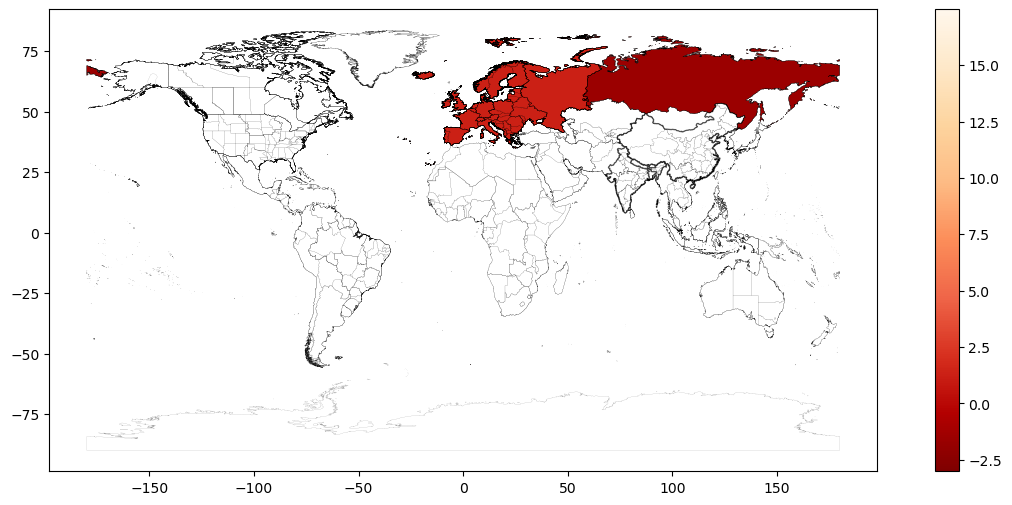

In [229]:
ax = countries_ecoinvent["geometry"].boundary.plot(figsize=(15, 6), edgecolor='black', linewidth=0.05)

merged_CC[["S1", "geometry"]].plot(figsize=(15, 6), column='S1', ax=ax, legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10), cmap='OrRd_r')

#ax = merged.plot(figsize=(15, 6), column='S1', legend=True, missing_kwds=dict(edgecolor="grey", color="white"))

<AxesSubplot:>

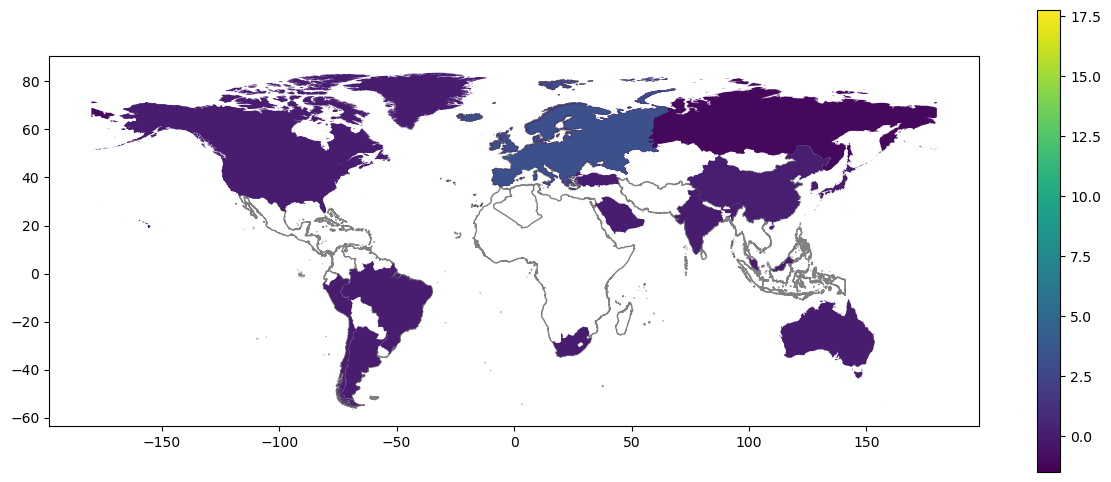

In [175]:
merged_CC[["S2", "geometry"]].plot(figsize=(15, 6), column='S2', legend=True, missing_kwds=dict(edgecolor="grey", facecolor="none", zorder=-10))